<font size="+5">#09. Componentes Principales (PCA)</font>

# Cargar Datos

> - Simplemente, copiamos y pegamos las siguientes líneas de código para cargar los datos.
> - La tabla contiene **estadísticas sobre Accidentes de Coche** (columnas).
> - En cada uno de los **Estados de USA** (filas).

```python
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(10)
```

In [1]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
MT,21.4,8.346,9.416,17.976,18.190,816.21,85.15
WY,17.4,7.308,5.568,14.094,15.660,791.14,122.04
NV,14.7,5.439,4.704,13.965,14.553,1029.87,138.71
VT,13.6,4.080,4.080,13.056,12.920,716.20,109.61
HI,17.5,9.450,7.175,14.350,15.225,861.18,120.92
KS,17.8,4.806,4.272,13.706,15.130,780.45,133.80
MS,17.6,2.640,5.456,1.760,17.600,896.07,155.77
PA,18.2,9.100,5.642,17.472,16.016,905.99,153.86
FL,17.9,3.759,5.191,16.468,16.826,1160.13,144.18


# Escalar Variables

- Para que las variables sean **comparables**.
- Usaremos el `StandardScaler()`.

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [5]:
datos_normalizados = scaler.fit_transform(df)

In [6]:
import pandas as pd

In [9]:
dfnorm = pd.DataFrame(datos_normalizados, columns=df.columns, index=df.index)

In [10]:
dfnorm.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
AZ,0.688443,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778
AR,1.619498,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125
CA,-0.928653,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178


# Modelo de k-Means en Python

## Entrenar Modelo

> - Seleccionamos **todas** las variables `model.fit(X=df)`.
> - Y agruparemos **4 clusters**.

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=3)

In [13]:
model.fit(X=dfnorm)

KMeans(n_clusters=3)

## Predicciones con el Modelo

> - `model.predict()`
> - Guardamos el resultado como **columna nueva** `df`.

In [14]:
dfsel = dfnorm.copy()

In [16]:
dfsel['cluster'] = model.predict(X=dfsel)

In [18]:
dfsel.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,cluster
abbrev,,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514,1
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900,1
AZ,0.688443,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778,1
AR,1.619498,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125,1
CA,-0.928653,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178,2


## Visualización del Modelo

> - Las coordenadas de los puntos son los **datos reales**.
> - El modelo se dibuja **coloreando** los puntos.

In [19]:
import plotly.express as px

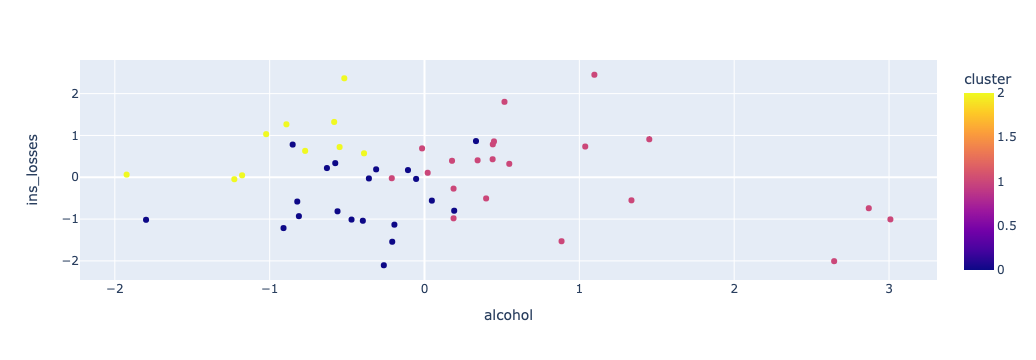

In [21]:
px.scatter(x='alcohol', y='ins_losses', data_frame=dfsel, color='cluster')

## Interpretación del Modelo

> - Hay algo **muy raro** en el modelo.
> - Los puntos **están mezclados** entre los grupos.
> Por qué?
> - Tan solo estamos representando 2 variables.
> - Y hemos usado todas en `model.fit()`

# Agrupación de Variables con PCA

> - En el **siguiente vídeo** obtendrás una explicación del modelo.
> - https://www.youtube.com/watch?v=HMOI_lkzW08

## Transformar los Datos a Componentes

> - PCA es otra forma de transformar los datos.
> - Para hacer, usamos el objeto `PCA()`.
> ¿Cómo ha ido evolucionando la tabla de datos, pues?
> 1. Datos Originales `df`.
> 2. Datos Normalizados `dfnorm`.
> 3. Datos Componentes Principales `dfpca` (ahora).

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA()

In [27]:
pd.DataFrame(pca.fit_transform(dfnorm), index=df.index)

,0,1,2,3,4,5,6
abbrev,,,,,,,
AL,1.603671,0.133449,0.317881,-0.795293,-0.579719,0.046223,0.210185
AK,1.144212,0.858234,0.736626,0.318988,-0.228701,-1.002625,0.008966
AZ,1.432172,-0.420506,0.338136,0.552513,0.168718,-0.804523,-0.076107
AR,2.491584,0.348968,-1.788747,0.264064,-0.372382,-0.481849,-0.147636
CA,-1.750638,0.633625,-0.136176,-0.974916,-0.315811,0.178510,-0.068958
CO,-0.925120,-0.154388,0.146177,-0.568096,0.116420,-0.240859,-0.098428
CT,-2.125359,1.370600,0.743078,-0.485553,-0.088337,0.486531,0.020256
DE,0.324658,1.574245,0.440982,0.338057,0.095481,-0.466100,-0.188961
DC,-4.635926,0.918997,0.720078,1.184313,-0.172554,-0.052800,-0.124806


## Visualizar Componentes con Cluster

> - Un simple **scatterplot** con `PC1` y `PC2`.
> - Colorear puntos según grupos.
> - Están **mezclados** los puntos ahora?

## Relación entre Variables Originales y las Componentes

> 1. **Influencia** de Variables Originales en PCA
> 2. Cómo calculamos un valor con PCA?
> 3. **Por qué** son x variables las que influyen x componente?

# Otras Técnicas para Agrupar Variables

> - En la siguiente página web veremos varias técnicas de **Reducción de Variables**:
> - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition